In [5]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("weatherHistory.csv")
print(data.head())

Saving weatherHistory.csv to weatherHistory (1).csv
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0 

In [8]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [10]:
print(data.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [11]:
data = data.fillna('null')

In [12]:
print(data.isnull().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [13]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [23]:
data['Fomatted Date'] = pd.to_datetime(data['Formatted Date'])


<ipython-input-23-69928cb4f3ba>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Fomatted Date'] = pd.to_datetime(data['Formatted Date'])


In [29]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['YearMonth'] = data['Formatted Date'].dt.to_period('M')
monthly_avg_temp = data.groupby('YearMonth')['Temperature (C)'].mean().reset_index()
print(monthly_avg_temp)

    YearMonth  Temperature (C)
0     2005-12         0.577778
1     2006-01        -1.677942
2     2006-02        -0.065394
3     2006-03         4.559274
4     2006-04        12.635031
..        ...              ...
128   2016-08        21.420296
129   2016-09        18.467924
130   2016-10         9.893242
131   2016-11         5.282662
132   2016-12         1.239158

[133 rows x 2 columns]


<ipython-input-29-ba580f1e4e7a>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data['Formatted Date'].dt.to_period('M')


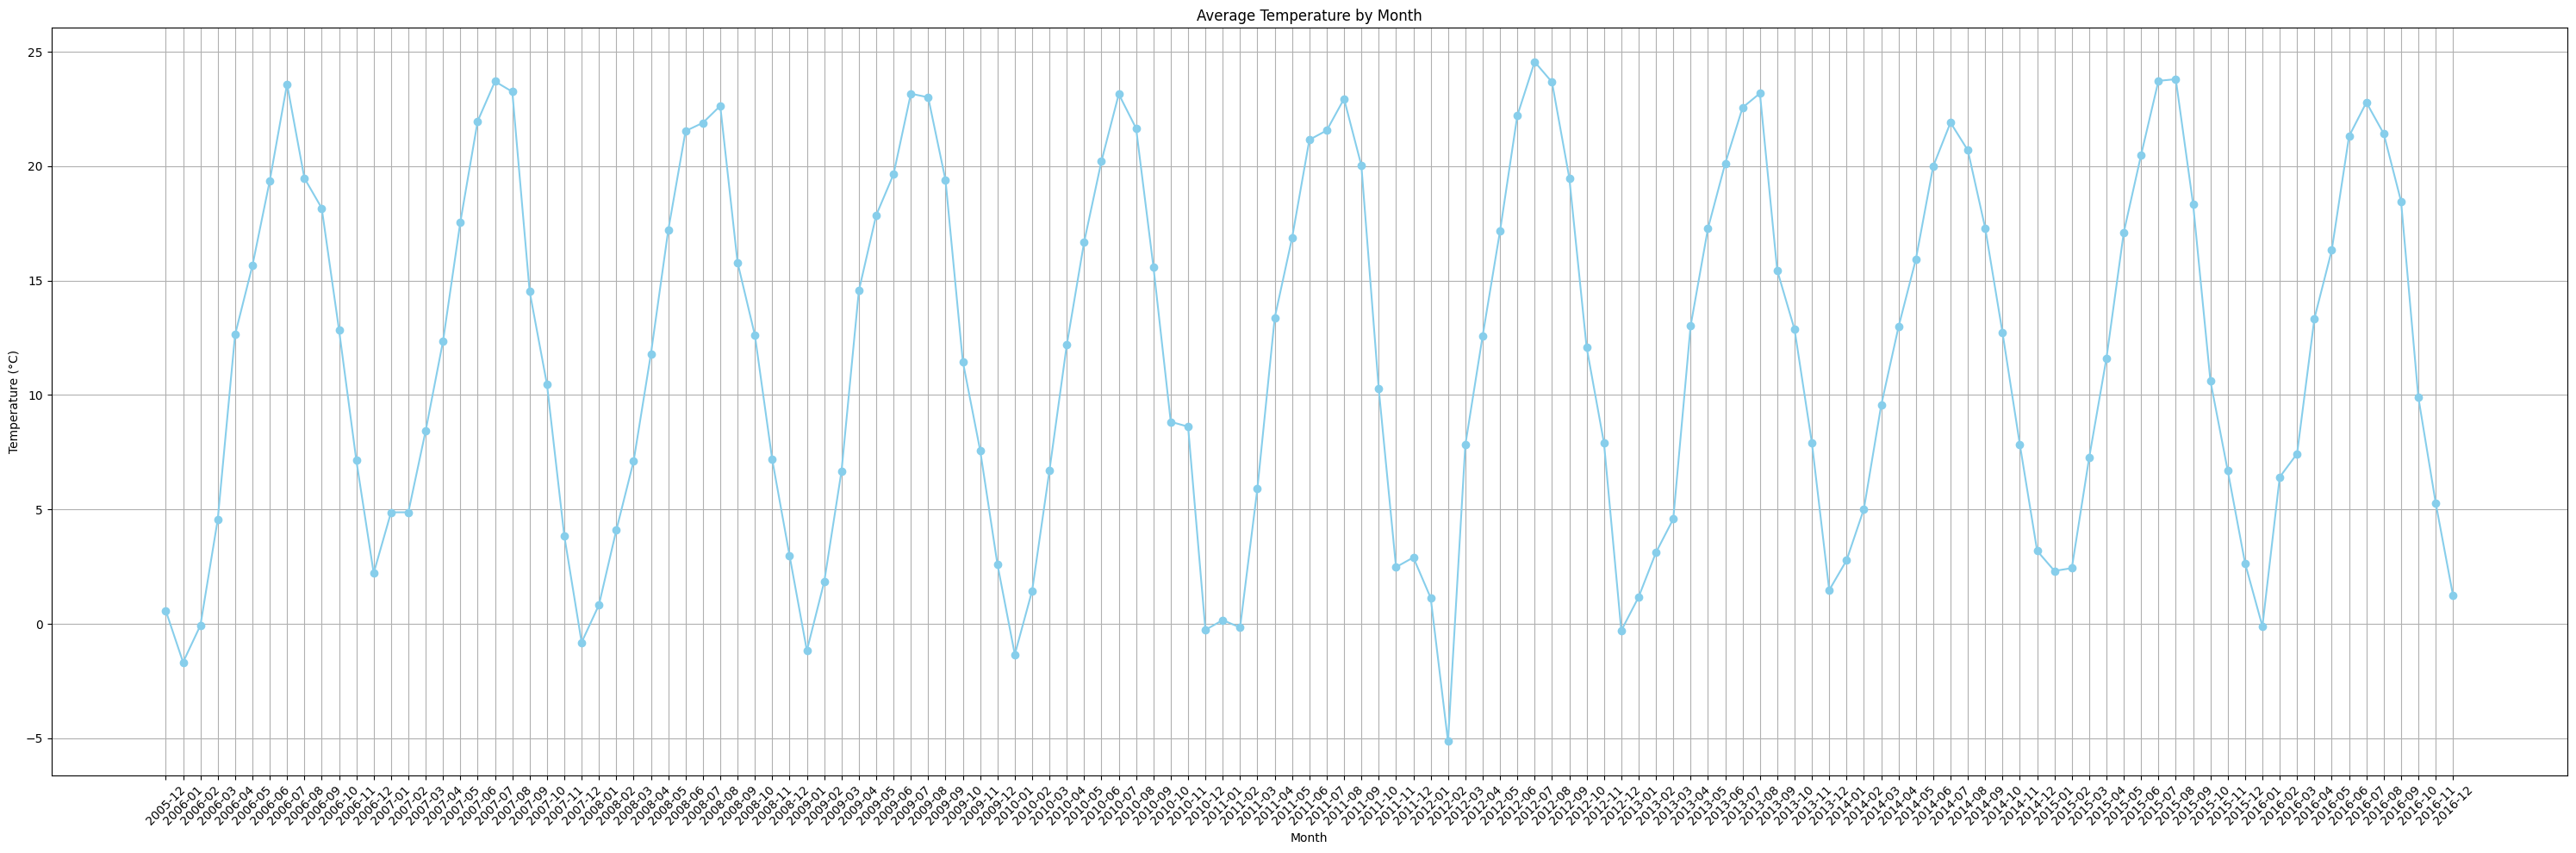

In [41]:
plt.figure(figsize=(30, 10))

plt.plot(monthly_avg_temp['YearMonth'].astype(str), monthly_avg_temp['Temperature (C)'], marker='o', color='skyblue')

plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

    YearMonth  Rain Count
0     2005-12           1
1     2006-01         287
2     2006-02         301
3     2006-03         578
4     2006-04         720
..        ...         ...
128   2016-08         744
129   2016-09         720
130   2016-10         405
131   2016-11         685
132   2016-12         517

[133 rows x 2 columns]


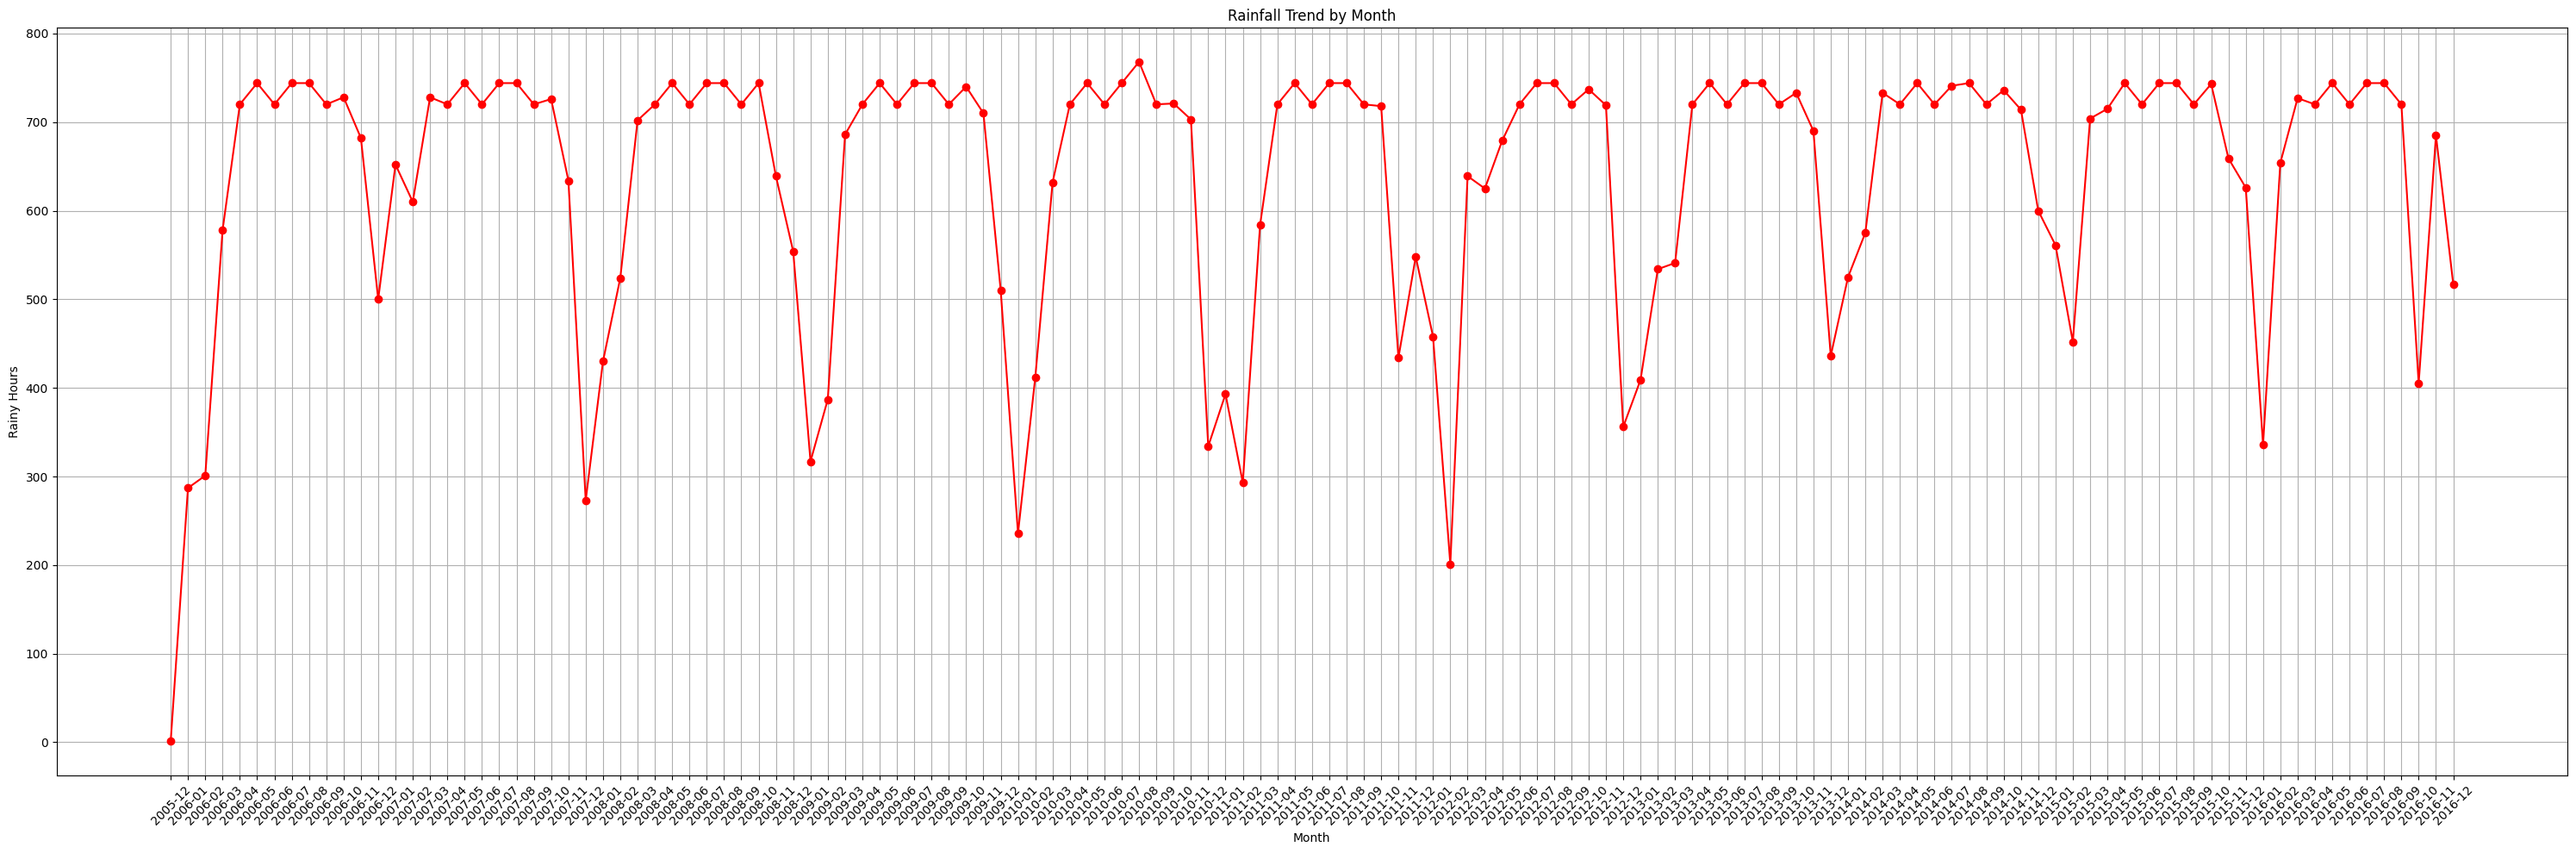

In [40]:
rain_data = data[data['Precip Type'] == 'rain']
monthly_rain_count = rain_data.groupby('YearMonth').size().reset_index(name='Rain Count')
print(monthly_rain_count)

plt.figure(figsize=(30, 10))

plt.plot(monthly_rain_count['YearMonth'].astype(str), monthly_rain_count['Rain Count'], marker='o', color='red')

plt.title("Rainfall Trend by Month")
plt.xlabel("Month")
plt.ylabel("Rainy Hours")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
hottest_day = data.loc[data['Temperature (C)'].idxmax()]
print("      Hottest Day:")
print(hottest_day)

# Coldest Day
coldest_day = data.loc[data['Temperature (C)'].idxmin()]
print("\n       Coldest Day:")
print(coldest_day)

      Hottest Day:
Formatted Date                             2007-07-22 13:00:00+00:00
Summary                                                        Clear
Precip Type                                                     rain
Temperature (C)                                            39.905556
Apparent Temperature (C)                                   37.538889
Humidity                                                        0.13
Wind Speed (km/h)                                            23.5865
Wind Bearing (degrees)                                         250.0
Visibility (km)                                                9.982
Loud Cover                                                       0.0
Pressure (millibars)                                         1007.55
Daily Summary               Partly cloudy starting in the afternoon.
Fomatted Date                              2007-07-22 15:00:00+02:00
YearMonth                                                    2007-07
Name: 12759, dt

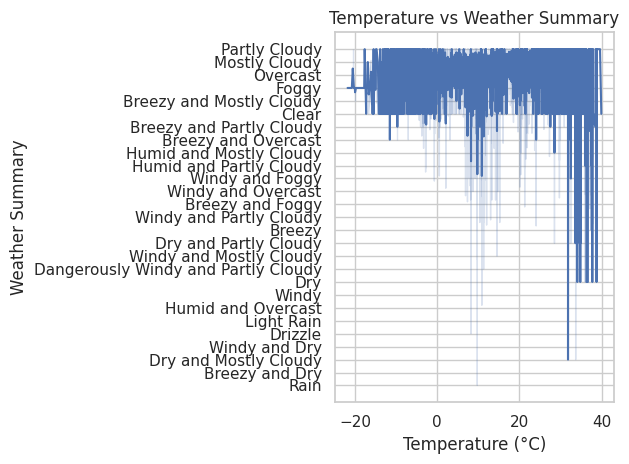

In [48]:
sb.set(style="whitegrid")

sb.lineplot(data=data, x='Temperature (C)', y='Summary')

plt.title("Temperature vs Weather Summary")
plt.xlabel("Temperature (°C)")
plt.ylabel("Weather Summary")
plt.tight_layout()
plt.show()

In [46]:
data.to_csv("cleaned_weather_data.csv", index=False)
from google.colab import files
files.download("cleaned_weather_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>